In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
#CVS A CARGAR


#agosto13 = pd.read_csv('resources/properati-AR-2013-08-01-properties-sell.csv')
#septiembre13 = pd.read_csv('resources/properati-AR-2013-09-01-properties-sell.csv')
#octubre13 = pd.read_csv('resources/properati-AR-2013-10-01-properties-sell.csv')
#noviembre13 = pd.read_csv('resources/properati-AR-2013-11-01-properties-sell.csv')
#diciembre13 = pd.read_csv('resources/properati-AR-2013-12-01-properties-sell.csv')
#enero14 = pd.read_csv('resources/properati-AR-2014-01-01-properties-sell.csv')
#febrero14 = pd.read_csv('resources/properati-AR-2014-02-01-properties-sell.csv')
#marzo14 = pd.read_csv('resources/properati-AR-2014-03-01-properties-sell.csv')
#abril14 = pd.read_csv('resources/properati-AR-2014-04-01-properties-sell.csv')
#mayo14 = pd.read_csv('resources/properati-AR-2014-05-01-properties-sell.csv')
#junio14 = pd.read_csv('resources/properati-AR-2014-06-01-properties-sell.csv')
#enero15 = pd.read_csv('resources/properati-AR-2015-01-01-properties-sell-six_months.csv')
#agosto15 = pd.read_csv('resources/properati-AR-2015-08-01-properties-sell-six_months.csv')
#marzo16 = pd.read_csv('resources/properati-AR-2016-03-01-properties-sell-six_months.csv')
#abril16 = pd.read_csv('resources/properati-AR-2016-04-01-properties-sell.csv')
#mayo16 = pd.read_csv('resources/properati-AR-2016-05-01-properties-sell.csv')
#junio16 = pd.read_csv('resources/properati-AR-2016-06-01-properties-sell.csv')
#enero17 = pd.read_csv('resources/properati-AR-2017-07-01-properties-sell-six_months.csv')
#agosto17 = pd.read_csv('resources/properati-AR-2017-08-01-properties-sell.csv')

#datos = pd.concat([agosto13, septiembre13, octubre13, noviembre13, diciembre13, enero14, febrero14, \
#                          marzo14, abril14, mayo14, junio14, enero15, agosto15, marzo16, abril16, mayo16, \
#                          junio16, enero17, agosto17])

datos = pd.read_csv('resources/properati-AR-2017-08-01-properties-sell.csv')


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187482 entries, 0 to 187481
Data columns (total 27 columns):
id                            187482 non-null object
created_on                    187482 non-null object
operation                     187482 non-null object
property_type                 187482 non-null object
place_name                    187447 non-null object
place_with_parent_names       187482 non-null object
country_name                  187482 non-null object
state_name                    187482 non-null object
geonames_id                   158318 non-null float64
lat-lon                       118761 non-null object
lat                           118761 non-null float64
lon                           118761 non-null float64
price                         154443 non-null float64
currency                      154441 non-null object
price_aprox_local_currency    154443 non-null float64
price_aprox_usd               154443 non-null float64
surface_total_in_m2           12502

# Limpieza y Preparación de Datos

In [4]:
#Elimino columnas innecesarias, que son relativas al sitio web.
datos = datos.drop(['id', 'properati_url', 'image_thumbnail', 'geonames_id'],axis=1)

#datos = datos.loc[:,['created_on', 'description', 'floor', 'place_name', 'place_with_parent_names', \
#                                 'price_aprox_usd', 'price_usd_per_m2', 'property_type', 'rooms', 'surface_in_m2']]

#datos.columns = ['fecha', 'descripcion', 'piso', 'localidad', 'lugar', 'precio', 'precio_por_m2',\
#'tipo_propiedad', 'habitaciones', 'superficie_m2']

datos['created_on'] = pd.to_datetime(datos['created_on'], errors='coerce')

datos.head()


,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,2012-09-19,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,NaN,NaN,NaN,...,120000.0,333.0,93.0,360.360360,1290.322581,NaN,NaN,NaN,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,CASA EN VENTA
1,2012-10-22,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,NaN,NaN,NaN,...,220000.0,220.0,220.0,1000.000000,1000.000000,NaN,NaN,NaN,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,CASA EN VENTA
2,2012-11-01,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,"-38.0199509,-57.5265733",-38.019951,-57.526573,...,NaN,NaN,42.0,NaN,NaN,NaN,2.0,NaN,DTO. 2 AMB. C/ VISTA PLENA AL 6 X 3DOMITORIO ...,DTO. 2 AMB. C/ VISTA PLENA AL MAR
3,2012-11-26,sell,house,Sierra de los Padres,|Argentina|Buenos Aires Interior|General Pueyr...,Argentina,Buenos Aires Interior,"-37.9511934894,-57.7752885836",-37.951193,-57.775289,...,NaN,661.0,265.0,NaN,NaN,NaN,6.0,NaN,PROPIEDAD DE CATEGORIA CUENTA CON: 4 DORMITOR...,CHALET EN VENTA
4,2012-12-08,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6544492346,-58.4895603251",-34.654449,-58.489560,...,185000.0,300.0,103.0,616.666667,1796.116505,NaN,5.0,NaN,Casa Multifamiliar en Mataderos!!! Sobre lote ...,CASA EN VENTA


In [5]:
#Verificamos datos
print(datos['country_name'].unique())
#Sabemos que solo hay un pais: Argentina

['Argentina']


In [6]:
print(datos['state_name'].unique())

['Bs.As. G.B.A. Zona Oeste' 'Buenos Aires Costa Atlántica'
 'Buenos Aires Interior' 'Capital Federal' 'Bs.As. G.B.A. Zona Norte'
 'Neuquén' 'Río Negro' 'Chubut' 'Misiones' 'Bs.As. G.B.A. Zona Sur'
 'San Luis' 'Salta' 'Córdoba' 'La Pampa' 'Corrientes' 'Santa Fe'
 'Entre Ríos' 'Chaco' 'Mendoza' 'Tierra Del Fuego' 'Formosa' 'San Juan'
 'Tucumán' 'Catamarca' 'Santa Cruz' 'Jujuy' 'La Rioja'
 'Santiago Del Estero']


In [7]:
#Ya que filtraremos las propiedades por lugar, nos fijamos que no haya nulos en ese campo
datos.loc[datos['place_with_parent_names'].isnull(),['place_with_parent_names']].count()

place_with_parent_names    0
dtype: int64

In [5]:
#Tenemos que remover todos aquellos datos que no tienen precio, puesto que no aportan al análisis. 

datos =datos[datos['price'] > 10000]

#Removemos tambien superficies anómalas
datos = datos[datos['surface_covered_in_m2'] > 20]

datos = datos[datos['surface_total_in_m2'] > 20]


In [6]:
#Eliminamos duplicados
datos = datos.drop_duplicates()

# Separación de datos en datasets

In [7]:
#Datos BUENOS AIRES
datosBUE = datos[datos['state_name'].str.startswith('B')]
print(datosBUE['state_name'].unique())

['Bs.As. G.B.A. Zona Oeste' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Costa Atlántica'
 'Buenos Aires Interior']


In [8]:
print(datos['property_type'].unique())

['house' 'apartment' 'PH' 'store']


In [9]:
#Datos Capital Federal
datosCapital = datos[datos['state_name'] == 'Capital Federal']
datosCapital.head()

,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
4,2012-12-08,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6544492346,-58.4895603251",-34.654449,-58.489560,...,185000.0,300.0,103.0,616.666667,1796.116505,NaN,5.0,NaN,Casa Multifamiliar en Mataderos!!! Sobre lote ...,CASA EN VENTA
42,2013-05-05,sell,house,Barracas,|Argentina|Capital Federal|Barracas|,Argentina,Capital Federal,"-34.6514583,-58.3773545",-34.651458,-58.377355,...,140000.0,152.0,152.0,921.052632,921.052632,NaN,4.0,NaN,SANTIAGO JANNOT PROP. - - SRA. ALICIA 15-CA...,CASA EN VENTA
107,2013-05-24,sell,house,Paternal,|Argentina|Capital Federal|Paternal|,Argentina,Capital Federal,"-34.5951191,-58.4653876",-34.595119,-58.465388,...,210000.0,158.0,200.0,1329.113924,1050.000000,NaN,4.0,NaN,Hermosa casa en dos plantas reciclada a nueva ...,hermosa propiedad
162,2013-05-24,sell,apartment,Barracas,|Argentina|Capital Federal|Barracas|,Argentina,Capital Federal,"-34.6346787,-58.3710911",-34.634679,-58.371091,...,80000.0,60.0,60.0,1333.333333,1333.333333,NaN,2.0,NaN,"Departamento en torre con living comedor,cocin...",Departamento
189,2013-05-24,sell,apartment,Congreso,|Argentina|Capital Federal|Congreso|,Argentina,Capital Federal,"-34.6101819118,-58.3947372437",-34.610182,-58.394737,...,138000.0,84.0,79.0,1642.857143,1746.835443,NaN,3.0,NaN,"EXCELENTE 3 AMBIENTES AL FRENTE, CON BALCN. IM...",EDIFICIO DE EPOCA EN IMPECABLE ESTADO SUPER AM...


# Cantidades

In [13]:
#Cantidad de ventas por zona
datosCapital['total'] = 1
totalDatosCapitalByPlaces = datosCapital.groupby(['place_name', 'property_type']).sum()
totalDatosCapitalByPlaces = totalDatosCapitalByPlaces[['total']].reset_index()
#totalDatosCapitalByPlaces = totalDatosCapitalByPlaces.sort_values('total', ascending=False)
totalApartamentos =  totalDatosCapitalByPlaces[totalDatosCapitalByPlaces['property_type'] == 'apartment']
totalApartamentos.sort_values('total', ascending=False).head(10)


C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,place_name,property_type,total
25,Belgrano,apartment,2269
105,Palermo,apartment,2111
37,Caballito,apartment,1826
156,Recoleta,apartment,1414
189,Villa Crespo,apartment,1155
230,Villa Urquiza,apartment,1126
70,Flores,apartment,1011
21,Barrio Norte,apartment,1011
175,San Telmo,apartment,974
9,Almagro,apartment,962


In [14]:
totalCasas = totalDatosCapitalByPlaces[totalDatosCapitalByPlaces['property_type'] == 'house']
totalCasas.sort_values('total', ascending=False).head(10)

,place_name,property_type,total
42,Capital Federal,house,887
26,Belgrano,house,115
87,Mataderos,house,105
71,Flores,house,86
194,Villa Devoto,house,59
38,Caballito,house,57
18,Barracas,house,54
75,Floresta,house,53
201,Villa Lugano,house,52
106,Palermo,house,51


In [15]:
totalPH = totalDatosCapitalByPlaces[totalDatosCapitalByPlaces['property_type'] == 'PH']
totalPH.sort_values('total', ascending=False).head(10)

,place_name,property_type,total
85,Mataderos,PH,114
104,Palermo,PH,87
8,Almagro,PH,87
69,Flores,PH,79
188,Villa Crespo,PH,79
229,Villa Urquiza,PH,74
36,Caballito,PH,70
73,Floresta,PH,69
132,Parque Chacabuco,PH,60
81,Liniers,PH,59


In [16]:
totalStore = totalDatosCapitalByPlaces[totalDatosCapitalByPlaces['property_type'] == 'store']
totalStore.sort_values('total', ascending=False).head(10)

,place_name,property_type,total
107,Palermo,store,111
191,Villa Crespo,store,91
158,Recoleta,store,78
48,Centro / Microcentro,store,71
177,San Telmo,store,66
72,Flores,store,55
43,Capital Federal,store,52
23,Barrio Norte,store,48
92,Monserrat,store,46
15,Balvanera,store,44


## Precios por M2

In [17]:
#Precios En Capital Federal
datosCapital.sort_values('price_per_m2', ascending=False)

,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,...,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,total
130239,2017-07-19,sell,store,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,"-34.5482214811,-58.4557160557",-34.548221,-58.455716,...,500.0,105.0,5833.284720,476190.476190,NaN,NaN,NaN,Departamento con vista al Rio de la Plata.ESTA...,Departamento - L.De Nuñez,1
130238,2017-07-19,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,"-34.5482214811,-58.4557160557",-34.548221,-58.455716,...,500.0,105.0,5833.284720,476190.476190,NaN,NaN,NaN,Departamento con vista al Rio de la Plata.ESTA...,Departamento - L.De Nuñez,1
130241,2017-07-19,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,"-34.5482214811,-58.4557160557",-34.548221,-58.455716,...,500.0,105.0,5833.284720,476190.476190,NaN,NaN,NaN,Departamento con vista al Rio de la Plata.ESTA...,UF 4A CHATEU LIBERTADOR,1
130244,2017-07-19,sell,store,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,"-34.5482214811,-58.4557160557",-34.548221,-58.455716,...,500.0,105.0,5833.284720,476190.476190,NaN,NaN,NaN,Departamento con vista al Rio de la Plata.ESTA...,Local - L.De Nuñez,1
184530,2017-07-29,sell,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,"-34.601094524,-58.3981180792",-34.601095,-58.398118,...,50.0,42.0,10582.541000,224633.333333,NaN,NaN,NaN,"Departamento 50m² en Viamonte 2168, Capital Fe...",Departamento - Recoleta,1
92744,2017-04-28,sell,apartment,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.6222039,-58.416089",-34.622204,-58.416089,...,33.0,33.0,206333.333333,206333.333333,NaN,1.0,NaN,Departamento 1 ambiente divisible Depto en CU...,"Tu depa, ingresa con $ 29.000 y cuotas en pesos",1
92144,2017-04-28,sell,apartment,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,NaN,NaN,NaN,...,30.0,30.0,173826.066667,173826.066667,NaN,1.0,NaN,lan840- DEPTO FINANCIACION DIRECTA EN PESOSAnt...,lan840- DEPTO FINANCIACION DIRECTA EN PESOS,1
142359,2017-07-19,sell,apartment,Colegiales,|Argentina|Capital Federal|Colegiales|,Argentina,Capital Federal,"-34.574537,-58.4554388",-34.574537,-58.455439,...,88.0,25.0,2734.615227,171633.640000,7.0,NaN,NaN,EDIFICIO VIRREY LORETOEn Pozo.Posesión Febrero...,DEPARTAMENTO EN VENTA,1
142358,2017-07-19,sell,apartment,Colegiales,|Argentina|Capital Federal|Colegiales|,Argentina,Capital Federal,"-34.574537,-58.4554388",-34.574537,-58.455439,...,178.0,61.0,2767.538146,143994.967213,3.0,NaN,NaN,EDIFICIO VIRREY LORETOEn Pozo.Posesión Febrero...,DEPARTAMENTO EN VENTA,1
124811,2017-07-07,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,"-34.5817873,-58.4224832",-34.581787,-58.422483,...,35.0,35.0,8068.237714,143860.714286,NaN,1.0,NaN,Conservando la fachada clásica de la casa ubic...,Clásico y contemporáneo,1


In [18]:
datosCapitalByM2 = datosCapital.groupby(['place_name','property_type']).mean()
datosCapitalByM2 = datosCapitalByM2[['price_per_m2', 'rooms']].reset_index()
datosCapitalByM2.sort_values('price_per_m2', ascending=False).head(10)

,place_name,property_type,price_per_m2,rooms
100,Nuñez,store,49239.615556,NaN
145,Paternal,apartment,18039.904767,1.765306
175,San Telmo,apartment,15302.031693,2.170270
33,Boedo,apartment,14007.475650,1.238390
167,San Cristobal,apartment,12847.748714,1.754986
29,Boca,apartment,10102.570633,2.615385
230,Villa Urquiza,apartment,9593.228787,2.048193
159,Retiro,apartment,8612.344422,4.185714
27,Belgrano,store,8450.054085,1.000000
123,Palermo Viejo,store,8295.375999,NaN


In [19]:
promedioM2Apartment = datosCapitalByM2[datosCapitalByM2['property_type'] == 'apartment']
promedioM2Apartment.sort_values('price_per_m2', ascending=False).head(10)

,place_name,property_type,price_per_m2,rooms
145,Paternal,apartment,18039.904767,1.765306
175,San Telmo,apartment,15302.031693,2.170270
33,Boedo,apartment,14007.475650,1.238390
167,San Cristobal,apartment,12847.748714,1.754986
29,Boca,apartment,10102.570633,2.615385
230,Villa Urquiza,apartment,9593.228787,2.048193
159,Retiro,apartment,8612.344422,4.185714
25,Belgrano,apartment,7358.203449,3.011204
152,Puerto Madero,apartment,6735.583220,3.179577
121,Palermo Viejo,apartment,6659.677244,2.897436


In [20]:
promedioM2House = datosCapitalByM2[datosCapitalByM2['property_type'] == 'house']
promedioM2House.sort_values('price_per_m2', ascending=False).head(10)


,place_name,property_type,price_per_m2,rooms
110,Palermo Chico,house,6899.111297,NaN
34,Boedo,house,4368.163741,2.619048
157,Recoleta,house,3962.529988,4.000000
153,Puerto Madero,house,3647.581182,5.000000
79,Las Cañitas,house,3579.891773,NaN
122,Palermo Viejo,house,3392.088768,NaN
26,Belgrano,house,2982.932054,6.050000
106,Palermo,house,2941.678845,4.266667
118,Palermo Soho,house,2904.066067,NaN
114,Palermo Hollywood,house,2900.317399,6.000000


In [21]:

promedioM2PH = datosCapitalByM2[datosCapitalByM2['property_type'] == 'PH']
promedioM2PH.sort_values('price_per_m2', ascending=False).head(10)

,place_name,property_type,price_per_m2,rooms
116,Palermo Soho,PH,3355.489758,2.555556
108,Palermo Chico,PH,3159.090909,NaN
24,Belgrano,PH,2953.278108,3.645161
112,Palermo Hollywood,PH,2939.241264,3.363636
77,Las Cañitas,PH,2836.363636,2.500000
104,Palermo,PH,2753.958895,3.500000
53,Coghlan,PH,2753.545317,2.800000
20,Barrio Norte,PH,2732.533618,3.222222
162,Saavedra,PH,2679.971323,3.105263
155,Recoleta,PH,2676.113774,3.500000


In [22]:
promedioM2Store = datosCapitalByM2[datosCapitalByM2['property_type'] == 'store']
promedioM2Store.sort_values('price_per_m2', ascending=False).head(10)

,place_name,property_type,price_per_m2,rooms
100,Nuñez,store,49239.615556,NaN
27,Belgrano,store,8450.054085,1.0
123,Palermo Viejo,store,8295.375999,NaN
161,Retiro,store,7529.778639,NaN
158,Recoleta,store,6563.293902,1.0
115,Palermo Hollywood,store,6478.556938,NaN
111,Palermo Chico,store,6214.484608,NaN
154,Puerto Madero,store,6168.710848,NaN
107,Palermo,store,6085.005351,5.0
103,Once,store,5207.274322,NaN


# Precio en relación a superficie cubierta

In [23]:
datosCapitalBySurface = datosCapital.sort_values('surface_covered_in_m2', ascending=False)
datosCapitalBySurface.head(10)

,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,...,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,total
3835,2014-03-25,sell,store,San Cristobal,|Argentina|Capital Federal|San Cristobal|,Argentina,Capital Federal,"-34.6236204072,-58.40269804",-34.623620,-58.402698,...,298.0,22518.0,1070.469799,14.166445,NaN,NaN,NaN,CODIGO: 464-02 ubicado en: Av. San Juan al 270...,"Local Comercial en Venta en San Cristobal, Cap...",1
135222,2017-07-19,sell,store,Villa Soldati,|Argentina|Capital Federal|Villa Soldati|,Argentina,Capital Federal,"-34.6601221702,-58.4302513174",-34.660122,-58.430251,...,10958.0,10958.0,775.688994,775.688994,NaN,NaN,1.0,C.A.B.A - Villa Soldati - CÓDIGO 0146Excelente...,Excelente Nave Industrial de 10.960 m2 sobre t...,1
132152,2017-07-19,sell,store,Boca,|Argentina|Capital Federal|Boca|,Argentina,Capital Federal,"-34.6443487086,-58.3654248049",-34.644349,-58.365425,...,7722.0,7722.0,1036.001036,1036.001036,NaN,NaN,1.0,C.A.B.A - Boca - PRECIO A CONSULTAR - CÓDIGO 0...,Venta con RENTA. Espectacular depósito premium,1
5217,2014-06-09,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,"-34.5697166865,-58.4881185978",-34.569717,-58.488119,...,8395.0,7415.0,13.936867,15.778827,NaN,NaN,NaN,CODIGO: 129-007 ubicado en: Lebreton 4965 - P...,"Departamento en Venta en Villa Urquiza, Capita...",1
5219,2014-06-09,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,"-34.5728570494,-58.4862112999",-34.572857,-58.486211,...,6730.0,6410.0,18.573551,19.500780,NaN,NaN,NaN,CODIGO: 129-002 ubicado en: Diaz Coldrero 2527...,"Departamento en Venta en Villa Urquiza, Capita...",1
18064,2015-09-09,sell,house,San Telmo,|Argentina|Capital Federal|San Telmo|,Argentina,Capital Federal,"-34.6255912097,-58.3738239783",-34.625591,-58.373824,...,1135.0,5079.0,3171.806167,708.800945,NaN,NaN,NaN,EDIFICIO A TERMINAREste inmueble fue construid...,"Casa 1135m² en Brasil 600, Capital Federal, Sa...",1
150294,2017-07-19,sell,store,San Telmo,|Argentina|Capital Federal|San Telmo|,Argentina,Capital Federal,"-34.6255912097,-58.3738239783",-34.625591,-58.373824,...,5079.0,5079.0,846.623351,846.623351,NaN,NaN,NaN,EDIFICIO A TERMINAREste inmueble fue construid...,Edificio Comercial en San Telmo,1
5216,2014-06-09,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,"-34.5697166865,-58.4881185978",-34.569717,-58.488119,...,5553.0,5053.0,13.956420,15.337423,NaN,NaN,NaN,CODIGO: 129-006 ubicado en: Lebreton 4965 - P...,"Departamento en Venta en Villa Urquiza, Capita...",1
56324,2016-12-07,sell,store,Barracas,|Argentina|Capital Federal|Barracas|,Argentina,Capital Federal,"-34.6414207082,-58.3740632856",-34.641421,-58.374063,...,5000.0,5000.0,2400.000000,2400.000000,NaN,NaN,NaN,"Inmueble construido sobre fracción de 3.534,00...",Inmueble comercial en venta en Barracas,1
135209,2017-07-19,sell,store,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,"-34.6025706961,-58.3781475354",-34.602571,-58.378148,...,4800.0,4800.0,1354.166667,1354.166667,NaN,NaN,NaN,Capital Federal - Microcentro - CÓDIGO 0395Edi...,Edificio de oficinas en Block - Microcentro - ...,1


In [24]:
#Supongo que si hay superficie cubierta es menor a la total, hay balcones. Y quiero ver esa diferencia
datosCapitalBalcon = datosCapital[datosCapital['surface_total_in_m2'] > datosCapital['surface_covered_in_m2']]
#datosCapitalBalconFiltered = datosCapitalBalcon[['place_name','property_type', 'price']]
#datosCapitalBalconFiltered.sort_values('price', ascending=False)
datosCapitalBalcon.sort_values('price', ascending=False).head()

,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,...,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,total
130238,2017-07-19,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,"-34.5482214811,-58.4557160557",-34.548221,-58.455716,...,500.0,105.0,5833.284720,476190.476190,NaN,NaN,NaN,Departamento con vista al Rio de la Plata.ESTA...,Departamento - L.De Nuñez,1
130239,2017-07-19,sell,store,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,"-34.5482214811,-58.4557160557",-34.548221,-58.455716,...,500.0,105.0,5833.284720,476190.476190,NaN,NaN,NaN,Departamento con vista al Rio de la Plata.ESTA...,Departamento - L.De Nuñez,1
130241,2017-07-19,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,"-34.5482214811,-58.4557160557",-34.548221,-58.455716,...,500.0,105.0,5833.284720,476190.476190,NaN,NaN,NaN,Departamento con vista al Rio de la Plata.ESTA...,UF 4A CHATEU LIBERTADOR,1
130244,2017-07-19,sell,store,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,"-34.5482214811,-58.4557160557",-34.548221,-58.455716,...,500.0,105.0,5833.284720,476190.476190,NaN,NaN,NaN,Departamento con vista al Rio de la Plata.ESTA...,Local - L.De Nuñez,1
138580,2017-07-19,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,NaN,NaN,NaN,...,296.0,169.0,3830.917162,119638.591716,NaN,NaN,NaN,VENTA DUPLEX DE CATEGORIA DE 4 AMBIENTES CON E...,"VENTA DUPLEX 4 AMBIENTES C/ESCRITORIO, DEPENDE...",1


In [25]:
datosCapitalBalconGP = datosCapitalBalcon.groupby(['place_name','property_type']).mean()
datosCapitalBalconGP = datosCapitalBalconGP[['price_per_m2','price','surface_total_in_m2', 'surface_covered_in_m2']].reset_index()

In [26]:
promedioApartment = datosCapitalBalconGP[datosCapitalBalconGP['property_type'] == 'apartment']
promedioApartment.sort_values('price_per_m2', ascending=False).head(10)

,place_name,property_type,price_per_m2,price,surface_total_in_m2,surface_covered_in_m2
33,Boedo,apartment,16939.216217,6.359839e+05,63.500000,48.500000
166,San Telmo,apartment,16902.339866,6.337633e+05,56.844553,47.883721
137,Paternal,apartment,15108.263158,4.934354e+05,49.989899,43.252525
150,Retiro,apartment,13598.694937,1.351176e+06,150.926829,136.536585
29,Boca,apartment,12084.217539,7.032265e+05,68.487603,56.710744
216,Villa Urquiza,apartment,10382.137800,5.363912e+05,87.775739,74.616718
158,San Cristobal,apartment,9886.273553,3.703809e+05,59.023585,48.754717
25,Belgrano,apartment,8177.719589,7.100034e+05,109.153725,92.110178
115,Palermo Viejo,apartment,7696.763313,4.996090e+05,105.108108,89.054054
58,Colegiales,apartment,7119.722908,3.998558e+05,72.696629,59.617978


In [27]:
promedioApartment = datosCapitalBalconGP[datosCapitalBalconGP['property_type'] == 'house']
promedioApartment.sort_values('price_per_m2', ascending=False).head(10)

,place_name,property_type,price_per_m2,price,surface_total_in_m2,surface_covered_in_m2
105,Palermo Chico,house,6805.659052,3.260769e+06,596.153846,488.230769
148,Recoleta,house,3944.274680,9.200000e+05,312.666667,229.666667
78,Las Cañitas,house,3860.403697,8.850000e+05,304.000000,234.500000
116,Palermo Viejo,house,3392.088768,5.468000e+05,261.800000,158.000000
26,Belgrano,house,3123.058160,1.119971e+06,497.579710,356.391304
108,Palermo Hollywood,house,3048.146834,5.006000e+05,226.000000,152.600000
112,Palermo Soho,house,2904.066067,8.266667e+05,394.500000,285.166667
101,Palermo,house,2800.360564,6.988571e+05,354.142857,260.314286
95,Nuñez,house,2700.053901,5.654444e+05,287.074074,225.111111
217,Villa Urquiza,house,2684.803750,3.584667e+05,224.361111,164.250000


In [28]:
promedioPH = datosCapitalBalconGP[datosCapitalBalconGP['property_type'] == 'PH']
promedioPH.sort_values('price_per_m2', ascending=False).head(10)

,place_name,property_type,price_per_m2,price,surface_total_in_m2,surface_covered_in_m2
110,Palermo Soho,PH,3389.364777,274789.473684,114.736842,84.894737
103,Palermo Chico,PH,3159.090909,695000.000000,348.000000,220.000000
24,Belgrano,PH,3073.362680,321625.714286,156.800000,115.028571
106,Palermo Hollywood,PH,3025.476606,213692.307692,93.230769,72.692308
146,Recoleta,PH,2830.837174,216250.000000,89.500000,76.750000
53,Coghlan,PH,2815.464107,207778.571429,112.000000,81.714286
153,Saavedra,PH,2813.685263,187750.000000,94.071429,71.071429
76,Las Cañitas,PH,2800.000000,280000.000000,110.000000,100.000000
20,Barrio Norte,PH,2780.571941,230666.666667,118.888889,90.222222
99,Palermo,PH,2718.624998,301686.567164,158.388060,113.820896


In [29]:
promedioStore = datosCapitalBalconGP[datosCapitalBalconGP['property_type'] == 'store']
promedioStore.sort_values('price_per_m2', ascending=False).head(10)

,place_name,property_type,price_per_m2,price,surface_total_in_m2,surface_covered_in_m2
96,Nuñez,store,121445.296086,1.316812e+07,498.625,316.500000
117,Palermo Viejo,store,25833.333333,3.100000e+06,194.000,120.000000
149,Recoleta,store,15590.806180,2.454517e+06,191.000,156.666667
102,Palermo,store,10926.313335,1.264344e+06,220.240,184.680000
145,Puerto Madero,store,6965.174129,2.800000e+06,742.000,402.000000
56,Coghlan,store,5312.500000,8.500000e+05,376.000,160.000000
171,Tribunales,store,4591.836735,4.500000e+05,225.000,98.000000
27,Belgrano,store,4518.529242,6.814066e+05,225.000,174.375000
60,Colegiales,store,4320.000000,1.880000e+05,47.500,37.500000
164,San Nicolás,store,4108.504109,1.500000e+06,693.500,395.500000


In [30]:
#Precio promedio expensas por zona
expensas = datosCapital[datosCapital['expenses'] > 100 ]
expensasPorZona =  expensas.groupby(['place_name', 'property_type']).mean()
expensasPorZona = expensasPorZona[['expenses', 'price']].reset_index()
expensasPorZona.sort_values('expenses', ascending=False).head(10)

,place_name,property_type,expenses,price
138,Villa Luro,apartment,489287.804878,127570.731707
98,Paternal,store,10450.000000,162500.000000
107,Retiro,store,9300.000000,208333.333333
101,Puerto Madero,apartment,9244.626866,693999.985075
78,Palermo Chico,apartment,8267.421053,670285.263158
19,Belgrano,apartment,7341.127168,381581.573699
104,Recoleta,house,6600.000000,837500.000000
57,Las Cañitas,apartment,6520.647059,347350.000000
102,Puerto Madero,store,6222.000000,418000.000000
10,Balvanera,house,6100.000000,489000.000000


In [31]:
expensasApartment= expensasPorZona[expensasPorZona['property_type'] == 'apartment']
expensasApartment.sort_values('expenses', ascending=False).head(10)

,place_name,property_type,expenses,price
138,Villa Luro,apartment,489287.804878,127570.731707
101,Puerto Madero,apartment,9244.626866,693999.985075
78,Palermo Chico,apartment,8267.421053,670285.263158
19,Belgrano,apartment,7341.127168,381581.573699
57,Las Cañitas,apartment,6520.647059,347350.000000
103,Recoleta,apartment,5952.483146,399717.924157
75,Palermo,apartment,4739.424828,330132.135172
106,Retiro,apartment,4559.636364,308506.493506
16,Barrio Norte,apartment,4493.952663,292153.254438
68,Nuñez,apartment,4438.503311,326560.927152


In [32]:

expensasHouse= expensasPorZona[expensasPorZona['property_type'] == 'house']
expensasHouse.sort_values('expenses', ascending=False).head(10)


,place_name,property_type,expenses,price
104,Recoleta,house,6600.000000,837500.000000
10,Balvanera,house,6100.000000,489000.000000
118,San Telmo,house,5000.000000,205000.000000
6,Almagro,house,3800.000000,354000.000000
76,Palermo,house,3200.000000,349000.000000
131,Villa Devoto,house,3000.000000,130000.000000
143,Villa Pueyrredón,house,2300.000000,130000.000000
69,Nuñez,house,2000.000000,234000.000000
82,Palermo Hollywood,house,2000.000000,145000.000000
20,Belgrano,house,1713.333333,415500.333333


In [33]:

expensasPH= expensasPorZona[expensasPorZona['property_type'] == 'PH']
expensasPH.sort_values('expenses', ascending=False).head(10)


,place_name,property_type,expenses,price
30,Capital Federal,PH,4000.000000,230000.000000
133,Villa General Mitre,PH,1800.000000,102000.000000
71,Once,PH,1756.000000,148700.000000
18,Belgrano,PH,1693.000000,239300.000000
44,Congreso,PH,1650.000000,140000.000000
36,Chacarita,PH,1500.000000,130000.000000
39,Coghlan,PH,1400.000000,184666.666667
8,Balvanera,PH,1333.333333,167333.333333
74,Palermo,PH,1172.222222,206611.111111
84,Palermo Soho,PH,1162.500000,350000.000000


In [34]:
expensasStore= expensasPorZona[expensasPorZona['property_type'] == 'store']
expensasStore.sort_values('expenses', ascending=False).head(10)

,place_name,property_type,expenses,price
98,Paternal,store,10450.000000,162500.000000
107,Retiro,store,9300.000000,208333.333333
102,Puerto Madero,store,6222.000000,418000.000000
35,Centro / Microcentro,store,6000.000000,580000.000000
11,Balvanera,store,5300.000000,420000.000000
83,Palermo Hollywood,store,4800.000000,300000.000000
105,Recoleta,store,4566.533333,568600.000000
32,Capital Federal,store,4542.105263,388315.789474
2,Abasto,store,4500.000000,125000.000000
27,Boedo,store,4500.000000,120000.000000


# Habitaciones

In [35]:
#Hay además de departamentos, hoteles. 
#Habría que filtrar todo aquello que NO sea hoteles, o bien, tratarlos como categoría aparte. 
datosCapitalByRooms = datosCapital[pd.isnull(datosCapital['rooms']) != True]
datosCapitalByRooms = datosCapitalByRooms[datosCapitalByRooms['rooms'] < 7]


datosCapitalByRoomsGP = datosCapitalByRooms.groupby(['place_name','property_type']).mean()
datosCapitalByRoomsGPFiltered = datosCapitalByRoomsGP[['rooms','price']].reset_index()
#datosCapitalByRoomsGPFiltered.sort_values('price', ascending=False).head(10)

In [36]:
promedioRoomsAparment = datosCapitalByRoomsGPFiltered[datosCapitalByRoomsGPFiltered['property_type'] == 'apartment']
promedioRoomsAparment.sort_values('rooms', ascending=False).head(10)

,place_name,property_type,rooms,price
37,Catalinas,apartment,5.000000,550000.000000
171,Villa Soldati,apartment,3.833333,73166.666667
120,Retiro,apartment,3.617886,486571.991870
86,Palermo Chico,apartment,3.451220,925971.115854
117,Recoleta,apartment,3.435429,516149.674286
114,Puerto Madero,apartment,3.155752,954593.916814
153,Villa Lugano,apartment,3.085714,80897.142857
15,Barrio Norte,apartment,3.082443,349015.109924
19,Belgrano,apartment,2.950758,412708.647727
81,Once,apartment,2.904000,167875.440000


In [37]:
promedioRoomsHouse = datosCapitalByRoomsGPFiltered[datosCapitalByRoomsGPFiltered['property_type'] == 'house']
promedioRoomsHouse.sort_values('rooms', ascending=False).head(10)

,place_name,property_type,rooms,price
169,Villa Santa Rita,house,6.000000,4.100000e+05
89,Palermo Hollywood,house,6.000000,1.200000e+06
132,San Telmo,house,6.000000,3.650000e+05
98,Parque Centenario,house,5.500000,4.200000e+05
151,Villa General Mitre,house,5.400000,3.520000e+05
24,Boca,house,5.375000,2.816250e+05
95,Parque Avellaneda,house,5.000000,2.000000e+05
115,Puerto Madero,house,5.000000,3.450000e+05
72,Monserrat,house,5.000000,2.749000e+05
20,Belgrano,house,4.857143,1.013571e+06


In [38]:
promedioRoomsPH = datosCapitalByRoomsGPFiltered[datosCapitalByRoomsGPFiltered['property_type'] == 'PH']
promedioRoomsPH.sort_values('rooms', ascending=False).head(10)

,place_name,property_type,rooms,price
102,Parque Chas,PH,6.000000,280000.000000
111,Pompeya,PH,4.600000,147400.000000
170,Villa Soldati,PH,4.500000,112000.000000
53,Constitución,PH,4.363636,145500.000000
3,Agronomía,PH,4.333333,196666.666667
50,Congreso,PH,4.285714,182857.142857
46,Colegiales,PH,4.173913,255608.695652
96,Parque Centenario,PH,4.111111,249444.444444
80,Once,PH,4.000000,166250.000000
108,Paternal,PH,3.950000,166350.000000


In [39]:
promedioRoomsStore = datosCapitalByRoomsGPFiltered[datosCapitalByRoomsGPFiltered['property_type'] == 'store']
promedioRoomsStore.sort_values('rooms', ascending=False).head(10)

,place_name,property_type,rooms,price
17,Barrio Norte,store,6.0,250000.0
85,Palermo,store,5.0,480000.0
73,Monserrat,store,4.0,190000.0
36,Capital Federal,store,3.0,220000.0
148,Villa Devoto,store,3.0,235000.0
49,Colegiales,store,2.0,144900.0
127,San Cristobal,store,2.0,79000.0
10,Balvanera,store,1.0,105000.0
21,Belgrano,store,1.0,750000.0
25,Boca,store,1.0,89000.0


# Cambios por Fecha 

In [40]:
#TODO 

# Hacer algo con las distancias

datosCapital['month'] = datosCapital['created_on'].dt.month
datosCapital['year'] = datosCapital['created_on'].dt.year

datosCapitalByYearMonth = datosCapital.groupby(['year','month','property_type']).mean().reset_index()
datosCapitalByYearMonthFiltered = datosCapitalByYearMonth[['year','month','property_type','price']]

apartmentByMonthYear = datosCapitalByYearMonthFiltered[datosCapitalByYearMonth['property_type'] == 'apartment']
apartmentByMonthYear.sort_values(['year','month'], ascending=False)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,year,month,property_type,price
166,2017,8,apartment,196156.140351
163,2017,7,apartment,420172.931707
159,2017,6,apartment,379507.690442
155,2017,5,apartment,258922.766134
151,2017,4,apartment,358308.487687
147,2017,3,apartment,315141.285205
143,2017,2,apartment,325359.907631
139,2017,1,apartment,261989.808321
135,2016,12,apartment,593521.031193
131,2016,11,apartment,442959.629231


In [41]:
storeByMonthYear = datosCapitalByYearMonthFiltered[datosCapitalByYearMonth['property_type'] == 'store']
storeByMonthYear.sort_values(['year','month'], ascending=False)


,year,month,property_type,price
168,2017,8,store,2.083333e+05
165,2017,7,store,1.109600e+06
161,2017,6,store,5.613575e+05
157,2017,5,store,4.024407e+05
153,2017,4,store,3.844000e+05
149,2017,3,store,6.939460e+05
145,2017,2,store,2.963750e+05
141,2017,1,store,4.556353e+05
137,2016,12,store,7.033039e+05
133,2016,11,store,4.859375e+05


In [42]:
PHByMonthYear = datosCapitalByYearMonthFiltered[datosCapitalByYearMonth['property_type'] == 'PH']
PHByMonthYear.sort_values(['year','month'], ascending=False)


,year,month,property_type,price
162,2017,7,PH,192792.069632
158,2017,6,PH,207629.943503
154,2017,5,PH,182700.000000
150,2017,4,PH,172970.802920
146,2017,3,PH,197738.947368
142,2017,2,PH,198392.500000
138,2017,1,PH,186128.571429
134,2016,12,PH,192852.941176
130,2016,11,PH,169906.896552
126,2016,10,PH,190026.217391


In [43]:
houseByMonthYear = datosCapitalByYearMonthFiltered[datosCapitalByYearMonth['property_type'] == 'house']
houseByMonthYear.sort_values(['year','month'], ascending=False)

,year,month,property_type,price
167,2017,8,house,2.860000e+05
164,2017,7,house,4.853822e+05
160,2017,6,house,4.778395e+05
156,2017,5,house,5.561523e+05
152,2017,4,house,5.756596e+05
148,2017,3,house,6.987939e+05
144,2017,2,house,5.941082e+05
140,2017,1,house,5.042202e+05
136,2016,12,house,6.272798e+05
132,2016,11,house,6.162209e+05


In [44]:
totalDatosCapitalByYearMonth = datosCapital.groupby(['year','month','property_type']).sum().reset_index()
totalDatosCapitalByYearMonthFiltered = totalDatosCapitalByYearMonth[['year','month','property_type','total']]

totalApartmentByMonthYear = totalDatosCapitalByYearMonthFiltered[totalDatosCapitalByYearMonthFiltered['property_type'] == 'apartment']
totalApartmentByMonthYear.sort_values(['year','month'], ascending=False)

,year,month,property_type,total
166,2017,8,apartment,57
163,2017,7,apartment,10455
159,2017,6,apartment,2103
155,2017,5,apartment,1689
151,2017,4,apartment,2274
147,2017,3,apartment,1122
143,2017,2,apartment,747
139,2017,1,apartment,673
135,2016,12,apartment,1090
131,2016,11,apartment,1300


In [45]:
totalHouseByMonthYear = totalDatosCapitalByYearMonthFiltered[totalDatosCapitalByYearMonthFiltered['property_type'] == 'house']
totalHouseByMonthYear.sort_values(['year','month'], ascending=False)

,year,month,property_type,total
167,2017,8,house,3
164,2017,7,house,421
160,2017,6,house,200
156,2017,5,house,151
152,2017,4,house,245
148,2017,3,house,148
144,2017,2,house,97
140,2017,1,house,104
136,2016,12,house,84
132,2016,11,house,158


In [46]:
totalPHByMonthYear = totalDatosCapitalByYearMonthFiltered[totalDatosCapitalByYearMonthFiltered['property_type'] == 'PH']
totalPHByMonthYear.sort_values(['year','month'], ascending=False)


,year,month,property_type,total
162,2017,7,PH,517
158,2017,6,PH,177
154,2017,5,PH,186
150,2017,4,PH,137
146,2017,3,PH,95
142,2017,2,PH,80
138,2017,1,PH,70
134,2016,12,PH,68
130,2016,11,PH,87
126,2016,10,PH,46


In [47]:
totalStoreByMonthYear = totalDatosCapitalByYearMonthFiltered[totalDatosCapitalByYearMonthFiltered['property_type'] == 'store']
totalStoreByMonthYear.sort_values(['year','month'], ascending=False)




,year,month,property_type,total
168,2017,8,store,3
165,2017,7,store,427
161,2017,6,store,121
157,2017,5,store,86
153,2017,4,store,62
149,2017,3,store,64
145,2017,2,store,32
141,2017,1,store,35
137,2016,12,store,102
133,2016,11,store,88


In [63]:
datosCapital.head()

,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,total,month,year
4,2012-12-08,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6544492346,-58.4895603251",-34.654449,-58.489560,...,616.666667,1796.116505,NaN,5.0,NaN,Casa Multifamiliar en Mataderos!!! Sobre lote ...,CASA EN VENTA,1,12,2012
42,2013-05-05,sell,house,Barracas,|Argentina|Capital Federal|Barracas|,Argentina,Capital Federal,"-34.6514583,-58.3773545",-34.651458,-58.377355,...,921.052632,921.052632,NaN,4.0,NaN,SANTIAGO JANNOT PROP. - - SRA. ALICIA 15-CA...,CASA EN VENTA,1,5,2013
107,2013-05-24,sell,house,Paternal,|Argentina|Capital Federal|Paternal|,Argentina,Capital Federal,"-34.5951191,-58.4653876",-34.595119,-58.465388,...,1329.113924,1050.000000,NaN,4.0,NaN,Hermosa casa en dos plantas reciclada a nueva ...,hermosa propiedad,1,5,2013
162,2013-05-24,sell,apartment,Barracas,|Argentina|Capital Federal|Barracas|,Argentina,Capital Federal,"-34.6346787,-58.3710911",-34.634679,-58.371091,...,1333.333333,1333.333333,NaN,2.0,NaN,"Departamento en torre con living comedor,cocin...",Departamento,1,5,2013
189,2013-05-24,sell,apartment,Congreso,|Argentina|Capital Federal|Congreso|,Argentina,Capital Federal,"-34.6101819118,-58.3947372437",-34.610182,-58.394737,...,1642.857143,1746.835443,NaN,3.0,NaN,"EXCELENTE 3 AMBIENTES AL FRENTE, CON BALCN. IM...",EDIFICIO DE EPOCA EN IMPECABLE ESTADO SUPER AM...,1,5,2013


# DISTANCIAS

In [49]:
ferrocarriles = pd.read_csv('resources/estaciones-de-ferrocarril.csv', sep=';')
ferrocarriles.info



<bound method DataFrame.info of           LAT        LNG  ID                NOMBRE  \
0  -34.571334 -58.424295   2          3 DE FEBRERO   
1  -34.567571 -58.463056   4            BELGRANO R   
2  -34.562549 -58.435864   6  LISANDRO DE LA TORRE   
3  -34.558443 -58.449498   7            BELGRANO C   
4  -34.548895 -58.462400   8                 NUÑEZ   
5  -34.537522 -58.467586   9             RIVADAVIA   
6  -34.580456 -58.501732  10            PUEYRREDON   
7  -34.574767 -58.487968  11         GRAL. URQUIZA   
8  -34.568421 -58.479083  12       DR. L. M. DRAGO   
9  -34.565240 -58.475348  13               COGHLAN   
10 -34.553583 -58.487369  14        L. M. SAAVEDRA   
11 -34.576219 -58.398937  16               SALDIAS   
12 -34.578502 -58.426515  20               PALERMO   
13 -34.601326 -58.493953  21      VILLA DEL PARQUE   
14 -34.596780 -58.466634  22           LA PATERNAL   
15 -34.602598 -58.512619  23                DEVOTO   
16 -34.665399 -58.448489  24           PRES. ILLIA

In [18]:
subtes = pd.read_csv('resources/estaciones-de-subte.csv', encoding='UTF-8')
subtes['lat-subte'] = subtes['Y']
subtes['lon-subte'] = subtes['X']
subtes.head(100)

,X,Y,ID,ESTACION,LINEA,lat-subte,lon-subte
0,-58.398928,-34.635750,1.0,CASEROS,H,-34.635750,-58.398928
1,-58.400970,-34.629376,2.0,INCLAN,H,-34.629376,-58.400970
2,-58.402323,-34.623092,3.0,HUMBERTO 1°,H,-34.623092,-58.402323
3,-58.404732,-34.615242,4.0,VENEZUELA,H,-34.615242,-58.404732
4,-58.406036,-34.608935,5.0,ONCE - 30 DE DICIEMBRE,H,-34.608935,-58.406036
5,-58.380574,-34.604245,6.0,9 DE JULIO,D,-34.604245,-58.380574
6,-58.397924,-34.599757,7.0,FACULTAD DE MEDICINA,D,-34.599757,-58.397924
7,-58.385142,-34.601587,8.0,TRIBUNALES - TEATRO COLÓN,D,-34.601587,-58.385142
8,-58.407161,-34.591628,9.0,AGÜERO,D,-34.591628,-58.407161
9,-58.415955,-34.585156,10.0,R.SCALABRINI ORTIZ,D,-34.585156,-58.415955


In [42]:
from geopy.distance import vincenty


puertoMadero = datosCapital[datosCapital['place_name'] == 'Puerto Madero']
puertoMadero = puertoMadero.loc[puertoMadero['lat'].notnull(),:]
puertoMadero = puertoMadero.loc[puertoMadero['lon'].notnull(),:]

puertoMadero['lat-barrio'] = puertoMadero['lat']
puertoMadero['lon-barrio'] = puertoMadero['lon']


miCasa = (-34.598083,-58.404404)

#def calcularVincenty(df, distToCompare, estacion, linea):
#        df['vincenty'] = vincenty(dist,distToCompare).km
#        df['estacion'] = estacion
#        df['linea'] = linea
#    return df

lstVincenty = []
subtesChico = subtes.head(5)
pChico = puertoMadero.head(10)
#for index, subteRow in subtesChico.iterrows():
#    subteDist = (subteRow['lat'], subteRow['lon'])
#    lstVincenty = pChico.apply(lambda pmRow: pd.Series({'vincenty':vincenty((pmRow['lat'], pmRow['lon']),subteDist).km, 'estacion':subteRow['ESTACION']}), axis=1)
    #lstVincenty.append(puertoMadero.head(10).apply(lambda pmRow: pd.Series({'vincenty':vincenty((pmRow['lat'], pmRow['lon']),subteDist).km, 'estacion':subteRow['ESTACION']}), axis=1)) 
    
    
    
    
    
    #puertoMadero['vincenty'] = puertoMadero.apply(lambda pmRow: (vincenty((pmRow['lat'], pmRow['lon']),subteDist).km), axis=1)
    #vicenty = puertoMadero.apply(lambda pmRow: pd.Series({'vincenty':vincenty((pmRow['lat'], pmRow['lon']),subteDist).km, 'estacion':subteRow['ESTACION']}), axis=1) 
    #vicenty.columns = ['estacion', 'vicenty']
    #pm = puertoMadero.join(vicenty)

dfVincenty = pd.merge(puertoMadero.assign(A=1), subtes.assign(A=1), on='A').drop('A', 1)


print(vincenty().km)





ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [69]:
espaciosVerdes = pd.read_csv('resources/espacios-verdes-catastrales.csv')
espaciosVerdes['cantidad'] = 1
espaciosVerdesByBarrio = espaciosVerdes.groupby('BARRIO').sum().reset_index()

espaciosVerdesByBarrioFiltered = espaciosVerdesByBarrio[['BARRIO', 'cantidad']]
espaciosVerdesByBarrioFiltered = espaciosVerdesByBarrioFiltered.sort_values(by='cantidad', ascending=False)
espaciosVerdesByBarrioFiltered.head(10)


,BARRIO,cantidad
22,PALERMO,133
30,SAAVEDRA,91
40,VILLA LUGANO,69
11,FLORES,67
47,VILLA SOLDATI,58
38,VILLA DEVOTO,56
16,MATADEROS,54
28,RECOLETA,53
4,BELGRANO,52
3,BARRACAS,51


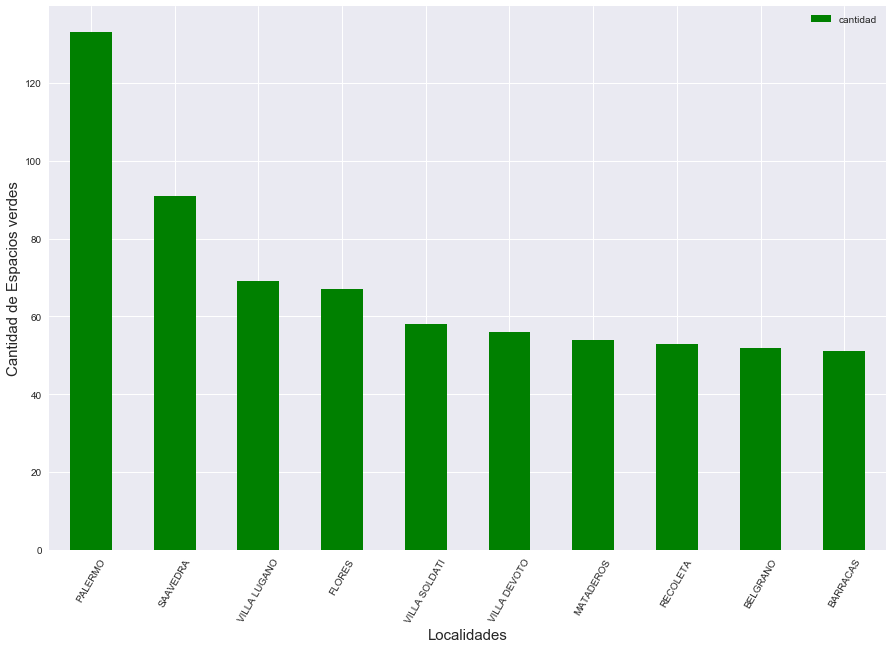

In [71]:
espaciosVerdesByBarrioFiltered.set_index('BARRIO').head(10).plot(kind="bar", stacked=True , rot=60, figsize=(15,10), color='green')

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Cantidad de Espacios verdes', fontsize=15);

In [ ]:
espaciosVerdes = pd.read_csv('resources/espacios-verdes-catastrales.csv')
espaciosVerdes['cantidad'] = 1
espaciosVerdesByBarrio = espaciosVerdes.groupby('BARRIO').sum().reset_index()

espaciosVerdesByBarrioFiltered = espaciosVerdesByBarrio[['BARRIO', 'cantidad']]
espaciosVerdesByBarrioFiltered = espaciosVerdesByBarrioFiltered.sort_values(by='cantidad', ascending=False)
espaciosVerdesByBarrioFiltered.head(10)

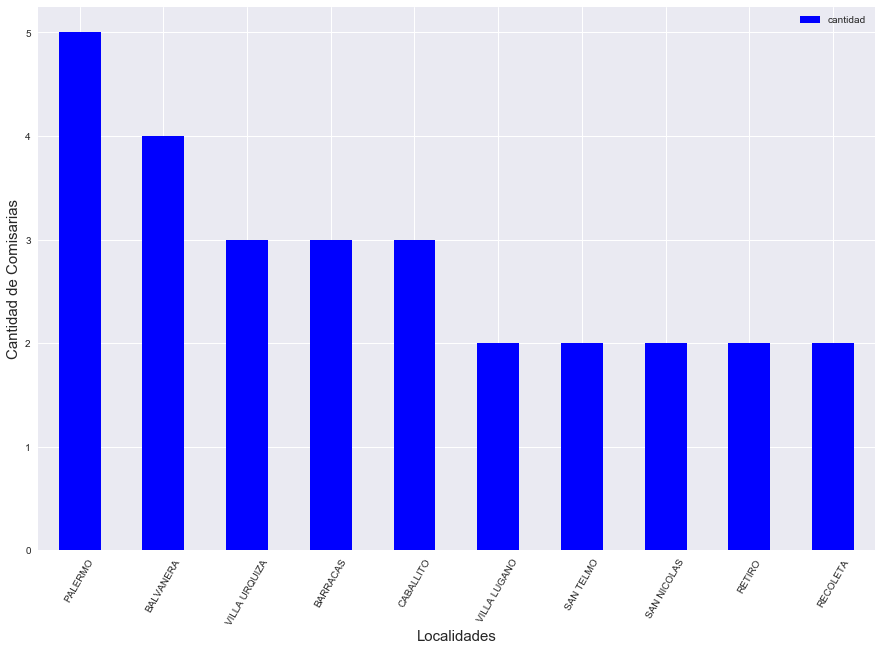

In [81]:
comisarias = pd.read_csv('resources/comisarias-policia-de-la-ciudad.csv', sep=';', encoding='UTF-8')
comisarias['cantidad'] = 1
comisariasByBarrio = comisarias.groupby('BARRIO').sum().reset_index()

comisariasFiltered = comisariasByBarrio[['BARRIO', 'cantidad']]
comisariasFiltered = comisariasFiltered.sort_values(by='cantidad', ascending=False)



comisariasFiltered.set_index('BARRIO').head(10).plot(kind="bar", stacked=True , rot=60, figsize=(15,10), color='blue')

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Cantidad de Comisarias', fontsize=15);